1. 야후에서 FAANG ('FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG') 데이터를 받아와서 

2. csv 파일로 저장하고

3. 파일을 불러와서

4. 종가열을 통합 하나의 데이터 프로임을 만들고

5. 이산, 연속 일일수익률을 계산하고, 비교하고, 종가를 다시 리커버리하고

6. 일일수익률의 평균, 분산, 공분산, 코릴레이션을 계산하고

7. 연평균 수익률, 볼 (standard deviation) 계산하고

8. 리스크-리턴 플롯 (x=볼, y=연평균 수익률 스케터 플롯) 을 그려라.

9. 랜덤포트폴리오 (쑛 불가능) 구성하여 리스크-리턴 플롯을 그려라.

10. 랜덤포트폴리오 (쑛 가능) 구성하여 리스크-리턴 플롯을 그려라.

In [1]:
tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

# Download Data

To install yfinance, run the following in terminal:
```
$ pip install yfinance
```
    
[yfinance](https://pypi.org/project/yfinance/)

In [2]:
import yfinance as yf
import os
tickers_len = len(tickers)
for count, ticker in enumerate(tickers):
    if not os.path.exists('{}.csv'.format(ticker)):
        stock = yf.Ticker(ticker)
        data = stock.history(period='max')
        data.to_csv('{}.csv'.format(ticker))
        print('{}/{} : {} Downloaded'.format(count+1, tickers_len, ticker))
    else:
        print('{}/{} : {} Downloaded'.format(count+1, tickers_len, ticker))

1/5 : FB Downloaded
2/5 : AMZN Downloaded
3/5 : AAPL Downloaded
4/5 : NFLX Downloaded
5/5 : GOOG Downloaded


# Combine Close

In [5]:
import pandas as pd

df = pd.DataFrame()

for count, ticker in enumerate(tickers):
    
    df_ = pd.read_csv('{}.csv'.format(ticker), 
                     index_col='Date',
                     parse_dates=True)
    df_.rename(columns={'Close':ticker}, inplace=True)
    
    df_.drop(['Open','High','Low','Volume','Dividends','Stock Splits'],
             axis=1,
             inplace=True)
    
    df_.dropna(inplace=True) # 배당 혹은 주식분할로 생기는 추가적인 가로열 제거
    
    if df.empty:
        df = df_
    else:
        df = df.join(df_, how='outer')
        
    print('{}/{} : {} added to df'.format(count+1, tickers_len, ticker))

1/5 : FB added to df
2/5 : AMZN added to df
3/5 : AAPL added to df
4/5 : NFLX added to df
5/5 : GOOG added to df


In [6]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
1980-12-12,NaN,NaN,0.10,NaN,NaN
1980-12-15,NaN,NaN,0.10,NaN,NaN
1980-12-16,NaN,NaN,0.09,NaN,NaN
1980-12-17,NaN,NaN,0.09,NaN,NaN
1980-12-18,NaN,NaN,0.09,NaN,NaN


In [7]:
df.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-08-31,293.20,3450.96,129.04,529.56,1634.18
2020-09-01,295.44,3499.12,134.18,556.55,1660.71
2020-09-02,302.50,3531.45,131.40,552.84,1728.28
2020-09-03,291.12,3368.00,120.88,525.75,1641.84
2020-09-04,282.73,3294.62,120.96,516.05,1591.04


In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.23,213.85,16.37,9.99,299.08
2012-05-21,34.03,218.11,17.32,10.25,305.91
2012-05-22,31.00,215.33,17.19,9.67,299.28
2012-05-23,32.00,217.28,17.61,10.27,303.59
2012-05-24,33.03,215.24,17.45,10.04,300.70


In [10]:
df.tail()

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-08-31,293.20,3450.96,129.04,529.56,1634.18
2020-09-01,295.44,3499.12,134.18,556.55,1660.71
2020-09-02,302.50,3531.45,131.40,552.84,1728.28
2020-09-03,291.12,3368.00,120.88,525.75,1641.84
2020-09-04,282.73,3294.62,120.96,516.05,1591.04


# Plot Close

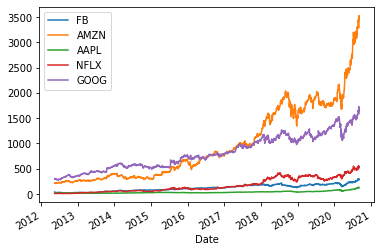

In [11]:
df.plot()

In [13]:
# df_starting_100 = df / df.iloc[0:1,:] * 100 # not working
df_starting_100 = df / df.iloc[0:1,:].values * 100
df_starting_100

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,100.000000,100.000000,100.000000,100.000000,100.000000
2012-05-21,89.013863,101.992051,105.803299,102.602603,102.283670
2012-05-22,81.088151,100.692074,105.009163,96.796797,100.066872
2012-05-23,83.703897,101.603928,107.574832,102.802803,101.507958
2012-05-24,86.398117,100.649988,106.597434,100.500501,100.541661
...,...,...,...,...,...
2020-08-31,766.936961,1613.729249,788.271228,5300.900901,546.402300
2020-09-01,772.796233,1636.249708,819.670128,5571.071071,555.272837
2020-09-02,791.263406,1651.367781,802.687844,5533.933934,577.865454


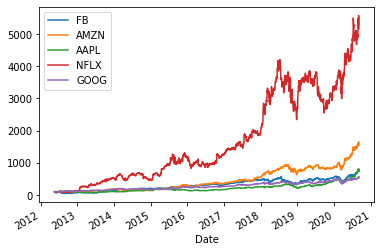

In [14]:
df_starting_100.plot()

# Compute Daily Return

$$\begin{array}{ccc}
\mbox{Discrete Daily Return}&&r_t^{(D)}=\frac{S_t-S_{t-1}}{S_{t-1}}\\
\mbox{Continuous Daily Return}&&r_t^{(C)}=\log\frac{S_t}{S_{t-1}}\\
\end{array}$$

In [15]:
import numpy as np
df_return_d = df.pct_change() # 이산 데일리 리턴
df_return_c = np.log(df / df.shift(1)) # 연속 데일리 리턴

In [16]:
print(df_return_d.head())
print(df_return_c.head())

                  FB      AMZN      AAPL      NFLX      GOOG
Date                                                        
2012-05-18       NaN       NaN       NaN       NaN       NaN
2012-05-21 -0.109861  0.019921  0.058033  0.026026  0.022837
2012-05-22 -0.089039 -0.012746 -0.007506 -0.056585 -0.021673
2012-05-23  0.032258  0.009056  0.024433  0.062048  0.014401
2012-05-24  0.032188 -0.009389 -0.009086 -0.022395 -0.009519
                  FB      AMZN      AAPL      NFLX      GOOG
Date                                                        
2012-05-18       NaN       NaN       NaN       NaN       NaN
2012-05-21 -0.116378  0.019725  0.056412  0.025693  0.022580
2012-05-22 -0.093255 -0.012828 -0.007534 -0.058249 -0.021911
2012-05-23  0.031749  0.009015  0.024139  0.060199  0.014299
2012-05-24  0.031680 -0.009433 -0.009127 -0.022650 -0.009565


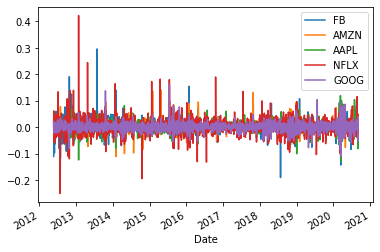

In [17]:
df_return_d.plot()

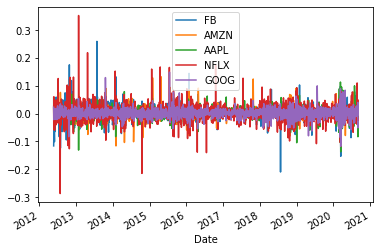

In [18]:
df_return_c.plot()

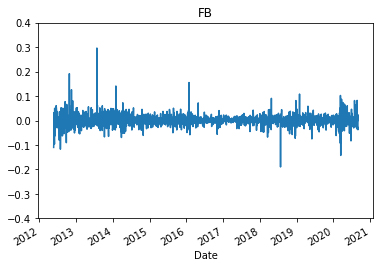

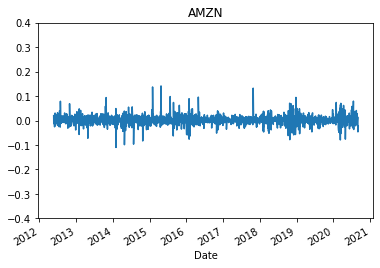

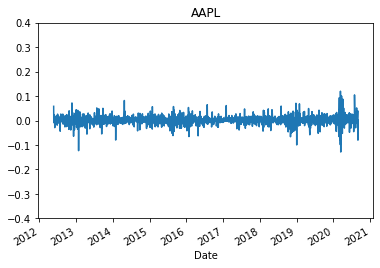

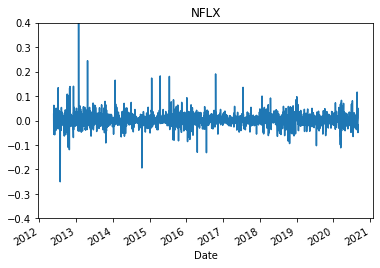

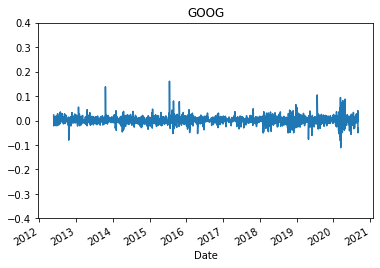

In [21]:
import matplotlib.pyplot as plt
for ticker in tickers:
    df_return_d[f'{ticker}'].plot()
    plt.title(f'{ticker}')
    plt.ylim([-0.4,0.4])
    plt.show()

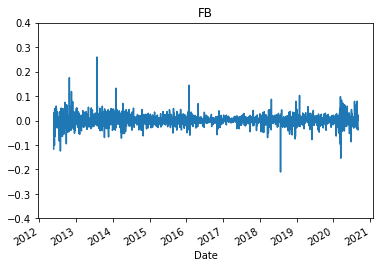

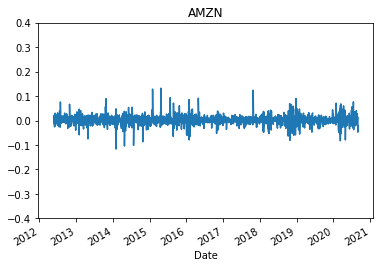

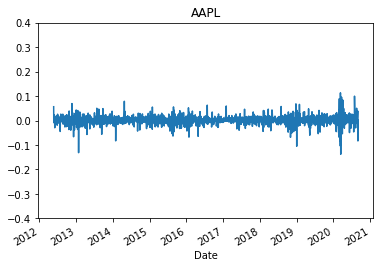

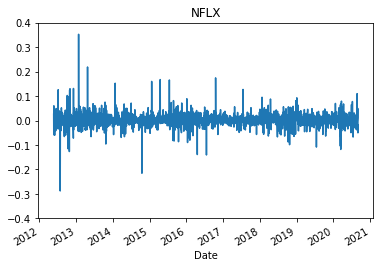

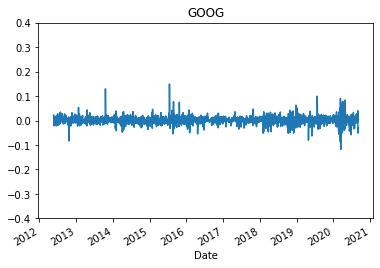

In [22]:
for ticker in tickers:
    df_return_c[f'{ticker}'].plot()
    plt.title(f'{ticker}')
    plt.ylim([-0.4,0.4])
    plt.show()

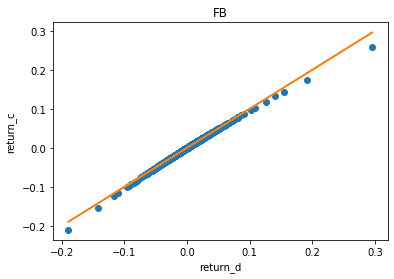

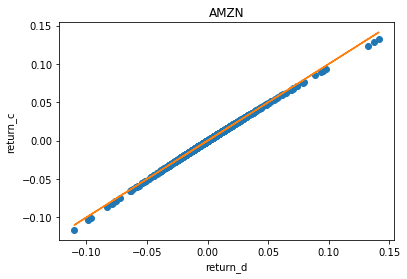

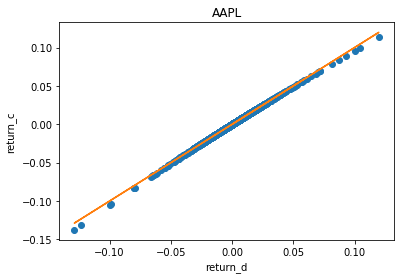

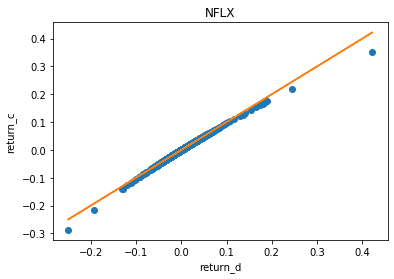

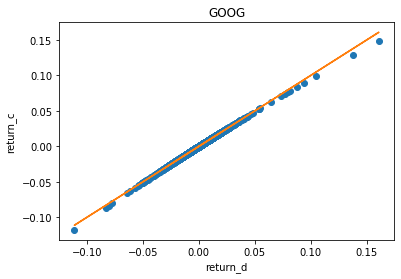

In [41]:
for ticker in tickers:
    plt.plot(df_return_d[f'{ticker}'], df_return_c[f'{ticker}'], 'o')
    plt.plot(df_return_d[f'{ticker}'], df_return_d[f'{ticker}'])
    plt.title(f'{ticker}')
    plt.xlabel('return_d')
    plt.ylabel('return_c')
    plt.show()

# Recover Close from Return

In [25]:
df_recover_d = np.cumprod(1+df_return_d, axis=0)
df_recover_d.iloc[0, :] = 1.
df_recover_d = df_recover_d * df.iloc[0:1,:].values
df_recover_d

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.23,213.85,16.37,9.99,299.08
2012-05-21,34.03,218.11,17.32,10.25,305.91
2012-05-22,31.00,215.33,17.19,9.67,299.28
2012-05-23,32.00,217.28,17.61,10.27,303.59
2012-05-24,33.03,215.24,17.45,10.04,300.70
...,...,...,...,...,...
2020-08-31,293.20,3450.96,129.04,529.56,1634.18
2020-09-01,295.44,3499.12,134.18,556.55,1660.71
2020-09-02,302.50,3531.45,131.40,552.84,1728.28


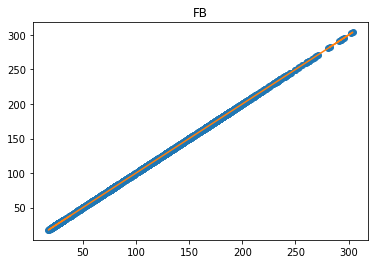

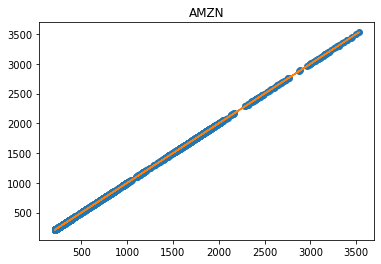

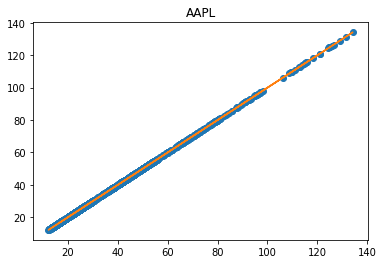

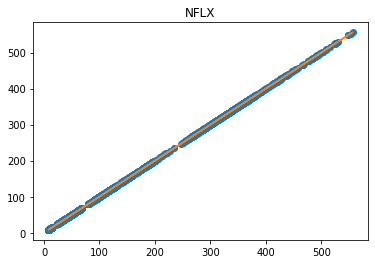

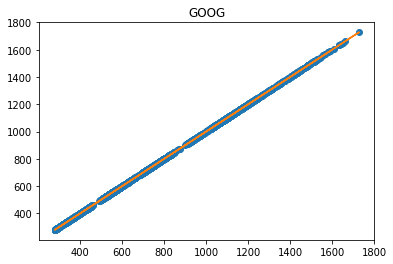

In [46]:
for ticker in tickers:
    plt.plot(df[f'{ticker}'], df_recover_d[f'{ticker}'], 'o')
    plt.plot(df[f'{ticker}'], df[f'{ticker}'])
    plt.title(f'{ticker}')
    plt.show()

In [28]:
df_recover_c = np.exp(np.cumsum(df_return_c, axis=0))
df_recover_c.iloc[0, :] = 1.
df_recover_c = df_recover_c * df.iloc[0:1,:].values
df_recover_c

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-05-18,38.23,213.85,16.37,9.99,299.08
2012-05-21,34.03,218.11,17.32,10.25,305.91
2012-05-22,31.00,215.33,17.19,9.67,299.28
2012-05-23,32.00,217.28,17.61,10.27,303.59
2012-05-24,33.03,215.24,17.45,10.04,300.70
...,...,...,...,...,...
2020-08-31,293.20,3450.96,129.04,529.56,1634.18
2020-09-01,295.44,3499.12,134.18,556.55,1660.71
2020-09-02,302.50,3531.45,131.40,552.84,1728.28


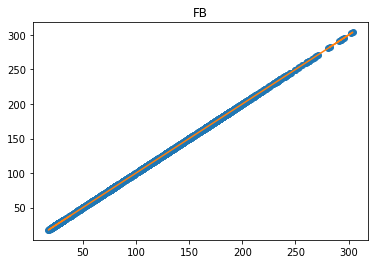

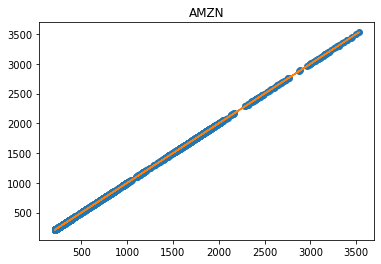

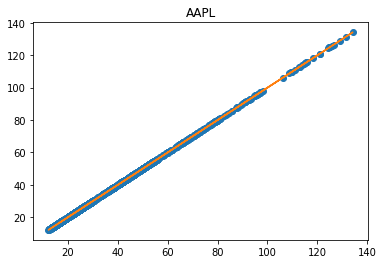

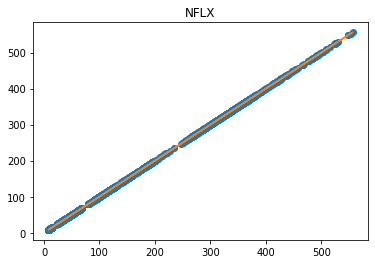

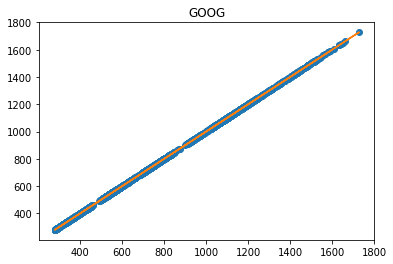

In [50]:
for ticker in tickers:
    plt.plot(df[f'{ticker}'], df_recover_c[f'{ticker}'], 'o')
    plt.plot(df[f'{ticker}'], df[f'{ticker}'])
    plt.title(f'{ticker}')
    plt.show()

# 코릴레이션, (annualized) 공분산, 분산, 볼라티리티, 연평균 수익률

In [15]:
df_return_d.corr()

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.437054,0.379790,0.280799,0.485910
AMZN,0.437054,1.000000,0.430072,0.428150,0.599209
AAPL,0.379790,0.430072,1.000000,0.249436,0.516128
NFLX,0.280799,0.428150,0.249436,1.000000,0.398506
GOOG,0.485910,0.599209,0.516128,0.398506,1.000000


In [29]:
Sigma = df_return_d.cov() * (12*21)
Sigma

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.140201,0.049377,0.040108,0.050557,0.046037
AMZN,0.049377,0.091039,0.036599,0.062119,0.045747
AAPL,0.040108,0.036599,0.079546,0.033828,0.036833
NFLX,0.050557,0.062119,0.033828,0.231218,0.048486
GOOG,0.046037,0.045747,0.036833,0.048486,0.064025


In [30]:
df_return_d.var() * (12*21)

FB      0.140201
AMZN    0.091039
AAPL    0.079546
NFLX    0.231218
GOOG    0.064025
dtype: float64

In [31]:
volatilities = df_return_d.std() * np.sqrt(12*21)
volatilities

FB      0.374435
AMZN    0.301727
AAPL    0.282039
NFLX    0.480851
GOOG    0.253031
dtype: float64

In [32]:
Mu = df_return_d.mean() * (12*21)
Mu

FB      0.310876
AMZN    0.375534
AAPL    0.281364
NFLX    0.589071
GOOG    0.233590
dtype: float64

# 리스크 리턴 플롯

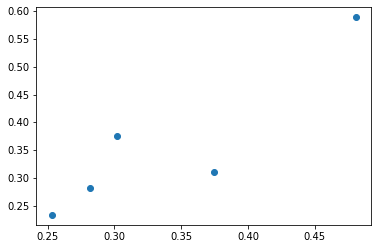

In [33]:
import matplotlib.pyplot as plt
volatilities = df_return_d.std() * np.sqrt(12*21)
means = df_return_d.mean() * (12*21)
plt.plot(volatilities, means, 'o')
plt.show()

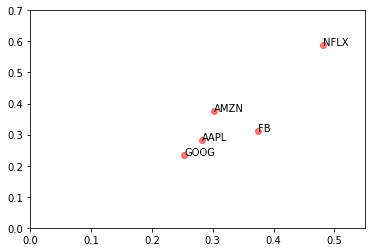

In [34]:
for ticker, volatility, mean in zip(tickers, volatilities, means):
    plt.plot(volatility, mean, 'o', color='r', alpha=0.5)
    plt.annotate(ticker, (volatility, mean))
plt.xlim([0, 0.55])
plt.ylim([0, 0.7])
plt.show()

# 이피션트 프런티어

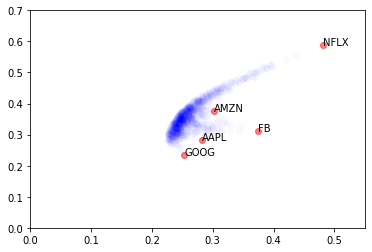

In [35]:
no_short = True
for i in range(1000):
    w = np.random.normal(size=(1,5))
    if no_short:
        w = np.exp(w)
    w /= np.sum(w) 
    variance = (w @ Sigma @ (w.T)).iloc[0,0] 
    mean = np.sum(Mu * w.reshape((-1,)))    
    plt.plot(np.sqrt(variance), mean, 'o', color='b', alpha=0.02)
    
for ticker, volatility, mean in zip(tickers, volatilities, means):
    plt.plot(volatility, mean, 'o', color='r', alpha=0.5)
    plt.annotate(ticker, (volatility, mean))

plt.xlim([0, 0.55])
plt.ylim([0, 0.7])
plt.show()

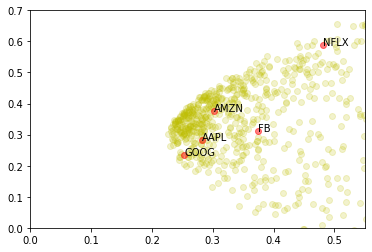

In [36]:
no_short = False
for i in range(1000):
    w = np.random.normal(size=(1,5))
    if no_short:
        w = np.exp(w)
    w /= np.sum(w)
    variance = (w @ Sigma @ (w.T)).iloc[0,0] 
    mean = np.sum(Mu * w.reshape((-1,)))
    plt.plot(np.sqrt(variance), mean, 'o', color='y', alpha=0.2)
    
for ticker, volatility, mean in zip(tickers, volatilities, means):
    plt.plot(volatility, mean, 'o', color='r', alpha=0.5)
    plt.annotate(ticker, (volatility, mean))

plt.xlim([0, 0.55])
plt.ylim([0, 0.7])
plt.show()

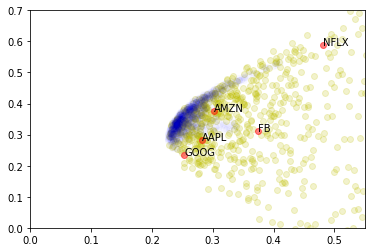

In [82]:
no_short = False
for i in range(1000):
    w = np.random.normal(size=(1,5))
    if no_short:
        w = np.exp(w)
    w /= np.sum(w)
    variance = (w @ Sigma @ (w.T)).iloc[0,0] 
    mean = np.sum(Mu * w.reshape((-1,)))
    plt.plot(np.sqrt(variance), mean, 'o', color='y', alpha=0.2)
    
no_short = True
for i in range(1000):
    w = np.random.normal(size=(1,5))
    if no_short:
        w = np.exp(w)
    w /= np.sum(w)
    variance = (w @ Sigma @ (w.T)).iloc[0,0] 
    mean = np.sum(Mu * w.reshape((-1,)))
    plt.plot(np.sqrt(variance), mean, 'o', color='b', alpha=0.02)
    
for ticker, volatility, mean in zip(tickers, volatilities, means):
    plt.plot(volatility, mean, 'o', color='r', alpha=0.5)
    plt.annotate(ticker, (volatility, mean))

plt.xlim([0, 0.55])
plt.ylim([0, 0.7])
plt.show()